Index(['Hours_Studied', 'Review_Session', 'Results'], dtype='object')


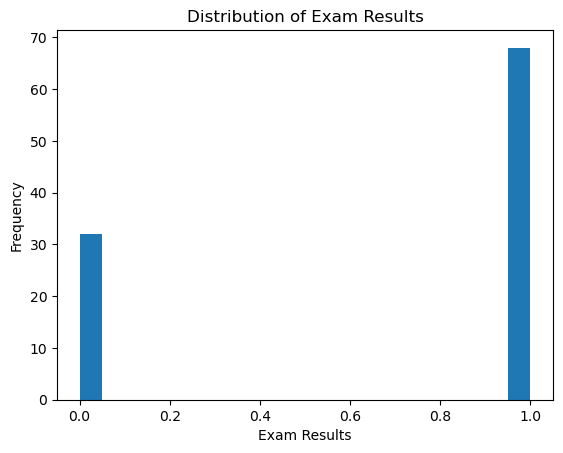

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("student_data.csv")

# Verify the column names
print(df.columns)  # Print the list of column names

# Create a histogram for a specific column (e.g., "Results")
plt.hist(df["Results"], bins=20)
plt.xlabel("Exam Results")
plt.ylabel("Frequency")
plt.title("Distribution of Exam Results")
plt.show()

Accuracy: 0.85
ROC AUC: 0.96


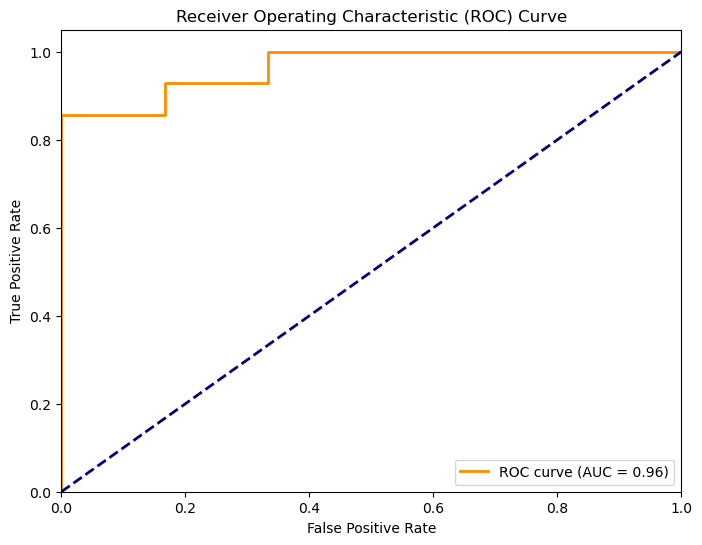

Model Coefficients:
Hours_Studied: 1.40
Review_Session: 1.43


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("student_data.csv")

# Assuming 'Results' is the target variable, and 'Hours_Studied' and 'Review_Session' are the features
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.2f}")

# Create and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Output model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.2f}")


In [7]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("student_data.csv")

# Assuming 'Results' is the target variable, and 'Hours_Studied' and 'Review_Session' are the features
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an SVM model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear:.2f}")

# Fit an SVM model with an RBF kernel and optimize the gamma parameter using grid search
rbf_svm = SVC(kernel='rbf')

# Define a grid of gamma values to search through
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Use GridSearchCV to perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rbf_svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best gamma value from the grid search
best_gamma = grid_search.best_params_['gamma']

# Fit the RBF SVM model with the best gamma
rbf_svm_best = SVC(kernel='rbf', gamma=best_gamma)
rbf_svm_best.fit(X_train, y_train)
y_pred_rbf = rbf_svm_best.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel (Optimized Gamma): {accuracy_rbf:.2f}")


Accuracy with Linear Kernel: 0.85
Accuracy with RBF Kernel (Optimized Gamma): 0.85
